In [3]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB 8.6 MB/s eta 0:00:45
   ---------------------------------------- 0.5/385.2 MB 7.0 MB/s eta 0:00:56
   ---------------------------------------- 0.8/385.2 MB 7.4 MB/s eta 0:00:53
   ---------------------------------------- 1.1/385.2 MB 6.9 MB/s eta 0:00:56
   ---------------------------------------- 1.4/385.2 MB 7.0 MB/s eta 0:00:56
   ---------------------------------------- 1.7/385.2 MB 7.1 MB/s eta 0:00:55
   ---------------------------------------- 2.0/385.2 MB 7.0 MB/s eta 0:00:55
   ---------------------------------------- 2.3/385.2 MB 7.1 MB/s eta 0:00:55
   ---------------------------------------- 2.6/385.2 MB 6.8 MB/s eta 0:00:57
   ---------------------------------------- 3.0/385.2 MB 7.0 MB/s eta 0:00:


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
#rint("using tensorflow version",tf.__veris_)

In [2]:
tf.__version__

'2.17.0'

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
#shape of the datasets 
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


This means that x_train contains 60,000 training samples.
Each sample is a 28x28 pixel image, likely grayscale, as there are no channels (like RGB) 
So, the shape (60000, 28, 28) refers to 60,000 images, each of size 28x28 pixels

x_train: 60,000 training images, each of size 28x28 pixels.
y_train: 60,000 labels corresponding to the training images.
X_test: 10,000 test images, each of size 28x28 pixels.
y_test: 10,000 labels corresponding to the test images

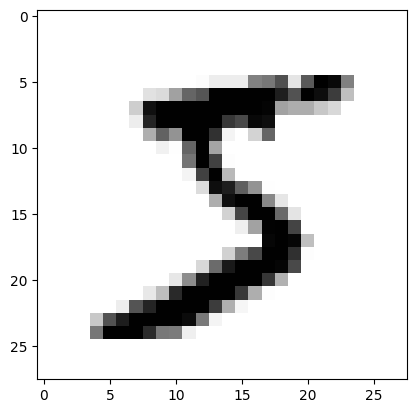

In [6]:
#visualizing the pictures 
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary') #cmap is to color map into (black n white)
plt.show()

In [7]:
y_train[0]

5

In [8]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
#encoding the labels 
from tensorflow.keras.utils import to_categorical

In [10]:
y_train_encoded= to_categorical(y_train) 
y_test_encoded= to_categorical(y_test)

Use of encoder is it converts numeric to categorical data

In [11]:
print('y_train[0]:',y_train[0])
print('y_train_encoded[0]:',y_train_encoded[0])

y_train[0]: 5
y_train_encoded[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
#preprocessing 
import numpy as np

In [15]:
x_train_reshape = np.reshape(x_train,(60000,784))
x_test_reshape = np.reshape(x_test,(10000,784)) 


# 784 is because we had the datasets of 28 pixels X 28 pixels which results to 784, the idea is to convert 2D array
# into 1D array so it can fit into neural network 


print("x_train reshape value:",x_train_reshape.shape)
print("x_test_reshape:",x_test_reshape.shape)

x_train reshape value: (60000, 784)
x_test_reshape: (10000, 784)


In [22]:
# display pixel values
print(set(x_train_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [23]:
# so we can see the values are lying between 0-255
# for better performance we will reduce it to 0 to 1 / or -1 to 1 this is called normalization
x_mean=np.mean(x_train_reshape)
x_std=np.std(x_train_reshape)

epsilon = 1e-10 # here we are adding the value of 0.0000000001 because to prevent divsion of any values by zero or smaller number

x_train_norm = (x_train_reshape-x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshape - x_mean) / (x_std + epsilon)


Purpose of Normalization:
Centering the data (mean = 0): Subtracting the mean helps make sure the data is centered around zero.
Scaling the data (standard deviation = 1): Dividing by the standard deviation ensures that the data has unit variance, which helps many machine learning algorithms (especially neural networks) converge faster during training.

In [26]:
print(set(x_train_norm[0].round())) #we can see the values being reduced to smaller figures 

{-0.0, 1.0, 2.0, 3.0}


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation="relu",input_shape=(784,)),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

In [29]:
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit (x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8121 - loss: 0.6373
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9425 - loss: 0.1947
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9572 - loss: 0.1433


In [32]:
#evaluating the model 
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print("Test set accuracy is " , accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.9492 - loss: 0.1591
Test set accuracy is  95.6499993801117


In [34]:
preds = model.predict(x_test_norm)
print("shape of preds",preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
shape of preds (10000, 10)


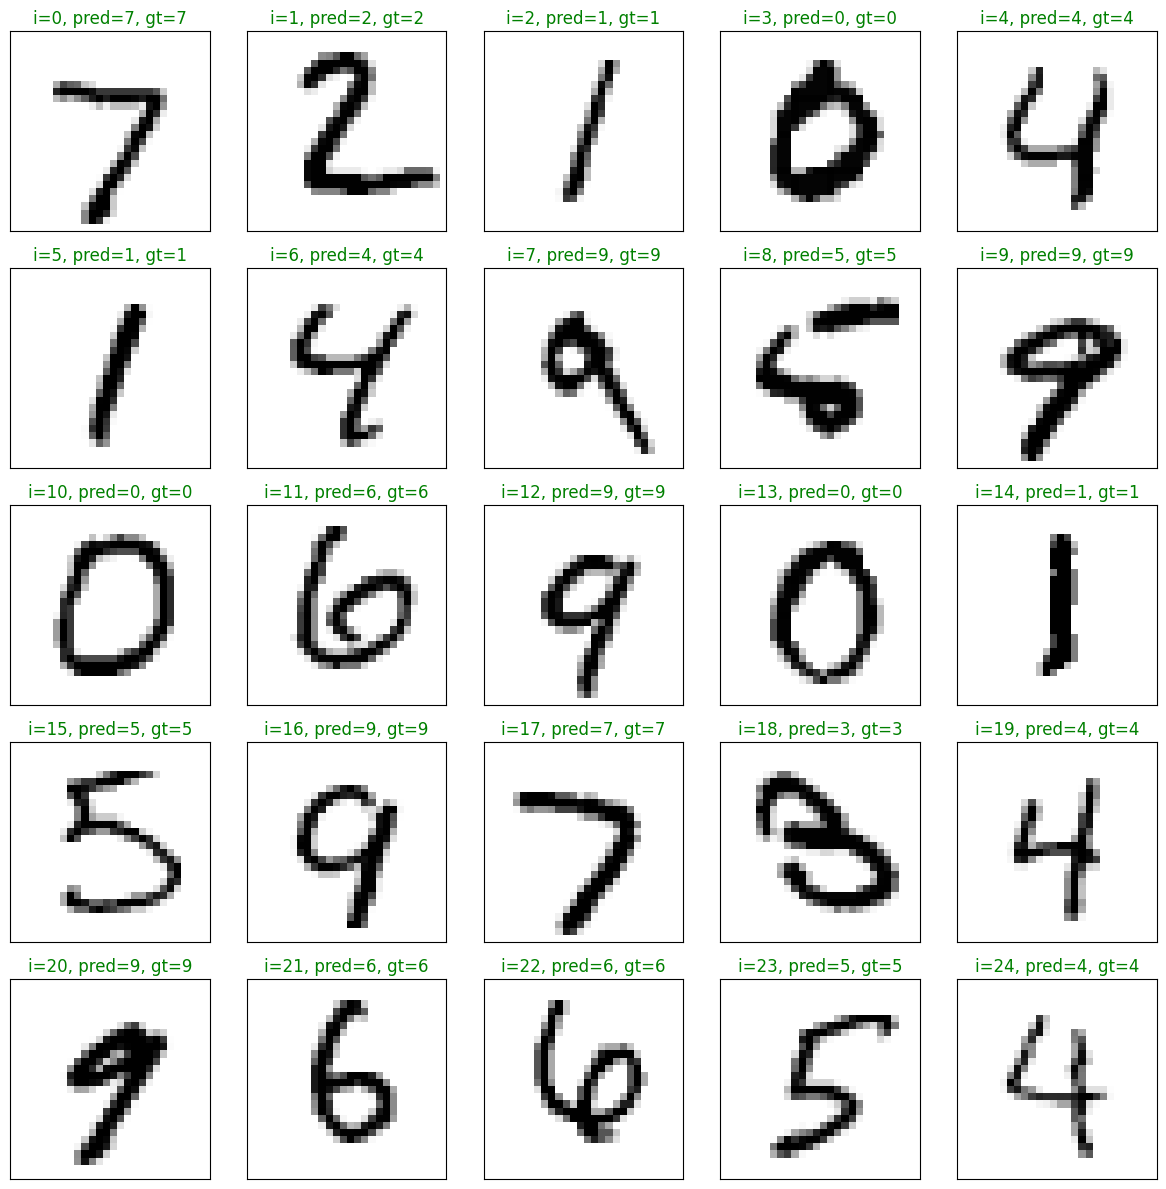

In [37]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index + i])
    gt = y_test[start_index + i]
    
    # Set color based on whether prediction is correct or not
    color = 'g' if pred == gt else 'r'
    
    # Set the title with color
    plt.title(f"i={start_index + i}, pred={pred}, gt={gt}", color=color)
    
    # Display the image
    plt.imshow(x_test[start_index + i], cmap="binary")

# Show all plots at once
plt.tight_layout()
plt.show()


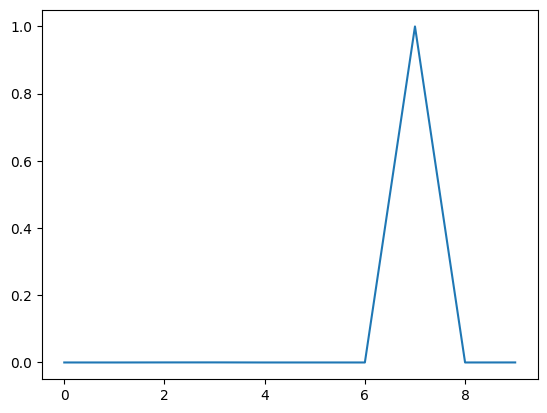

In [39]:
plt.plot(preds[0])
plt.show()